### 붓꽃 분류 예측 모델 만들기
- (1) 데이터 : iris.csv
- (2) 타  겟 : variety
- (3) 피  처 : petal, sepal....

- 모듈 import 
- 데이터 불러오기
- 데이터 전처리
- (필요하다면 )상관관계 확인 (corr, 시각화) ==> 분류모델이기 때문에 target과 feature 
- (필요하다면) 스케일링
- 훈련용 데이터 / 학습용 데이터 나누기
- 학습
- 성능평가

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = '../data/iris.csv'
irisDF = pd.read_csv(file)
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# 결측치 확인 => 결측치 없음.
irisDF.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [5]:
irisDF['variety']

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x2abb4d50a30>,
 'caps': [<matplotlib.lines.Line2D at 0x2abb4d50f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2abb4d50760>,
 'medians': [<matplotlib.lines.Line2D at 0x2abb4d6f4f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2abb4d6f790>,
 'means': []}

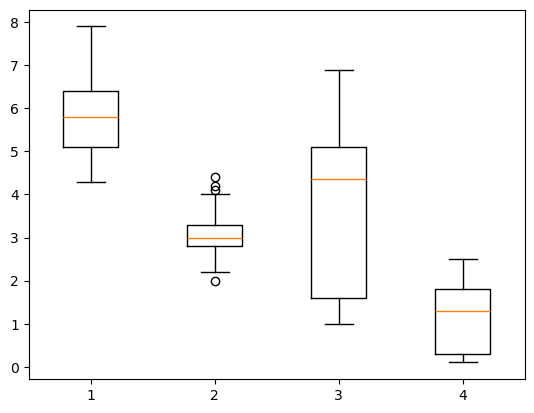

In [6]:
# boxplot을 통해 
plt.boxplot(irisDF[irisDF.columns[:-1]])

In [7]:
# 사분위 수를 활용한 이상치 제거
def remove_outlier(df, col, n):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3-q1

    boundary = iqr*n

    idx1 = df[df[col]>q3+boundary].index
    idx2 = df[df[col]<q1-boundary].index

    df = df.drop(idx1) # 최댓값보다 큰 이상치 drop
    df = df.drop(idx2) # 최솟값보다 작은 이상치 drop
    df = df.reset_index(drop=True)
    return df

In [8]:
irisDF = remove_outlier(irisDF, 'sepal.width', 1.5)
irisDF

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,Virginica
142,6.3,2.5,5.0,1.9,Virginica
143,6.5,3.0,5.2,2.0,Virginica
144,6.2,3.4,5.4,2.3,Virginica


{'whiskers': [<matplotlib.lines.Line2D at 0x2abb4de75e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2abb4de7b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2abb4de73a0>,
 'medians': [<matplotlib.lines.Line2D at 0x2abb4df70a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2abb4df7340>,
 'means': []}

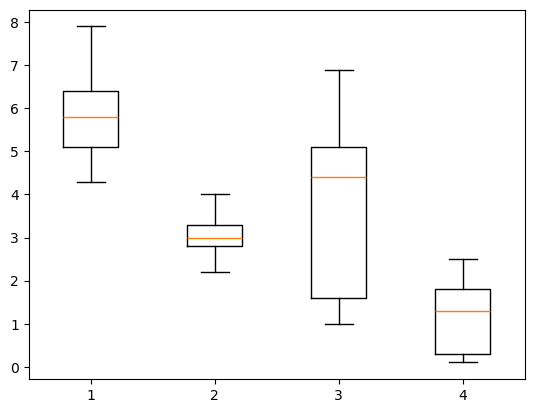

In [9]:
plt.boxplot(irisDF[irisDF.columns[:-1]])

In [10]:
# 중복값 확인 => 1개 있음. 
irisDF.duplicated().sum()

1

In [11]:
irisDF['variety'].value_counts() # 이상치가 삭제됨으로써 각 값의 비율이 달라짐.

variety
Virginica     50
Versicolor    49
Setosa        47
Name: count, dtype: int64

In [12]:
irisDF = irisDF.replace({'Setosa':0, 'Versicolor':1, 'Virginica':2})
#irisDF

In [13]:
featureDF = irisDF[irisDF.columns[:-1]]
targetDF = irisDF['variety']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.2, stratify=targetDF) # 이상치를 지우면서 50/49/47 됐으니까 비율 맞춰주기.

In [15]:
def print_shape(X_train, X_test, y_train, y_test) :
    print(f"X_train : {X_train.shape}")
    print(X_train.head(2))
    print()
    print(f"y_train : {y_train.shape}")
    print(y_train.head(2))
    print()
    print(f"X_test : {X_test.shape}")
    print(X_test.head(2))
    print()
    print(f"y_test : {y_test.shape}")
    print(y_test.head(2))
print_shape(X_train, X_test, y_train, y_test)

X_train : (116, 4)
     sepal.length  sepal.width  petal.length  petal.width
144           6.2          3.4           5.4          2.3
34            4.9          3.6           1.4          0.1

y_train : (116,)
144    2
34     0
Name: variety, dtype: int64

X_test : (30, 4)
    sepal.length  sepal.width  petal.length  petal.width
53           6.3          3.3           4.7          1.6
18           5.1          3.8           1.5          0.3

y_test : (30,)
53    1
18    0
Name: variety, dtype: int64


In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

In [17]:
from sklearn.svm import SVC

model2 = SVC()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

1.0

In [24]:
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression(max_iter=200)
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

1.0

In [27]:
y_preK = model.predict(featureDF)
y_preS = model2.predict(featureDF)
y_preL = model3.predict(featureDF)
print(y_preK, y_preS, y_preL, sep='\n\n')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# 결정 계수의 값
print('KNN r2_score =', r2_score(targetDF, y_preK))
print('SVC r2_score =', r2_score(targetDF, y_preS))
print('Log r2_score =', r2_score(targetDF, y_preL))
print()

# 평균제곱오차 
print('KNN mean_squared_error=', mean_squared_error(targetDF, y_preK))
print('SVC mean_squared_error=', mean_squared_error(targetDF, y_preS))
print('Log mean_squared_error=', mean_squared_error(targetDF, y_preL))
print()

# 평균절댓값오차
print('KNN mean_absolute_error=', mean_absolute_error(targetDF, y_preK))
print('SVC mean_absolute_error=', mean_absolute_error(targetDF, y_preS))
print('Log mean_absolute_error=', mean_absolute_error(targetDF, y_preL))
print()


KNN r2_score = 0.9277891613085565
SVC r2_score = 0.9484208295061117
Log r2_score = 0.9587366636048894

KNN mean_squared_error= 0.04794520547945205
SVC mean_squared_error= 0.03424657534246575
Log mean_squared_error= 0.0273972602739726

KNN mean_absolute_error= 0.04794520547945205
SVC mean_absolute_error= 0.03424657534246575
Log mean_absolute_error= 0.0273972602739726



In [21]:
new_data = pd.DataFrame({'sepal.length':7,
                        'sepal.width': 5,
                        'petal.length':10,
                        'petal.width':13}, index=range(0,1))
new_data

,sepal.length,sepal.width,petal.length,petal.width
0,7,5,10,13


In [22]:
# 예측
y_pre2 = model.predict(new_data)
y_pre2

array([2], dtype=int64)

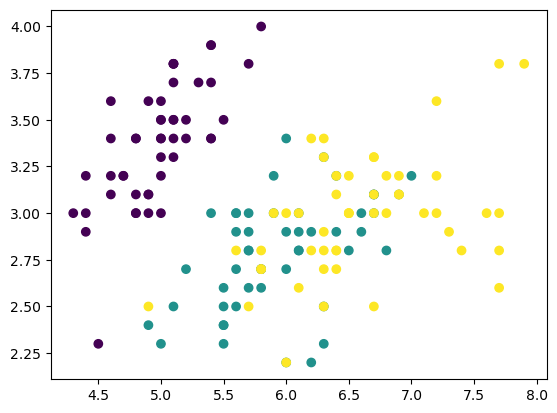

In [23]:
plt.scatter(featureDF['sepal.length'], featureDF['sepal.width'], c = targetDF)